In [1]:
# import libraries
import pandas as pd
import matplotlib
import numpy as np
import sklearn
import mglearn
import matplotlib.pyplot as plt
from matplotlib import rc
import seaborn as sns
import statistics as st
from sklearn import preprocessing
from sklearn.metrics import silhouette_score 
from sklearn.cluster import KMeans 
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import *
from scipy.cluster.hierarchy import linkage, dendrogram
%matplotlib inline 

## Data exploration

In [2]:
# upload dataset Donuld Trump
states_mined = pd.read_csv('States_mined.csv')
print('Dimension of array:{}'.format(states_mined.shape))
states_mined

Dimension of array:(51, 42)


,STATE_NAME,likes_Mean,retweet_count_Mean,user_followers_count_Mean,TextBlob_Subjectivity_Mean,TextBlob_Polarity_Mean,likes_Skewness,retweet_count_Skewness,user_followers_count_Skewness,TextBlob_Subjectivity_Skewness,...,likes_Variance,retweet_count_Variance,user_followers_count_Variance,TextBlob_Subjectivity_Variance,TextBlob_Polarity_Variance,likes_Std,retweet_count_Std,user_followers_count_Std,TextBlob_Subjectivity_Std,TextBlob_Polarity_Std
0,Alabama,3.967799,0.972482,6975.041569,0.336137,0.083791,15.354061,14.302827,3.665861,0.460725,...,4.801565e+02,28.248217,4.161292e+08,0.107459,0.082238,21.912475,5.314905,20399.244962,0.327809,0.286772
1,Alaska,1.191977,0.292264,3201.982808,0.331841,0.061126,8.201224,22.596758,4.311367,0.327775,...,1.846811e+01,5.908721,1.100722e+08,0.090065,0.069299,4.297454,2.430786,10491.530379,0.300108,0.263247
2,Arizona,5.016849,1.124816,2947.507443,0.321295,0.068841,38.970872,27.822626,22.353001,0.517254,...,5.229406e+03,184.669137,1.487521e+08,0.096776,0.080643,72.314634,13.589302,12196.398804,0.311089,0.283978
3,Arkansas,1.371534,0.411275,4821.268022,0.324972,0.072690,8.065272,7.333190,5.191989,0.466071,...,2.151216e+01,2.621630,4.261761e+08,0.100653,0.068388,4.638120,1.619145,20644.033938,0.317258,0.261510
4,California,5.424561,1.239721,7322.299407,0.318791,0.066259,95.096283,104.154739,32.793312,0.514186,...,1.350382e+04,1238.382601,1.146873e+10,0.099220,0.079340,116.205941,35.190661,107092.171878,0.314991,0.281674
5,Colorado,2.788580,0.634417,3827.468834,0.321035,0.052230,44.745951,28.461156,18.948490,0.510443,...,1.435558e+03,48.223403,6.767879e+08,0.097139,0.074447,37.888757,6.944307,26015.147106,0.311671,0.272849
6,Connecticut,8.966320,3.185240,4954.868252,0.296964,0.058268,11.662131,11.675757,6.053682,0.663685,...,2.353454e+03,363.715917,1.661773e+08,0.106007,0.082559,48.512408,19.071338,12890.976344,0.325587,0.287331
7,Delaware,1.253472,0.322917,1697.678819,0.290496,0.066290,10.145913,8.531362,16.774980,0.599220,...,1.657216e+01,1.519891,2.522807e+07,0.096056,0.073410,4.070892,1.232839,5022.755419,0.309929,0.270943
8,District of Columbia,48.795047,12.064551,35643.534499,0.296032,0.064854,27.802969,26.543525,8.291828,0.653344,...,3.069381e+05,14273.015969,3.425035e+10,0.096705,0.067368,554.019964,119.469728,185068.512514,0.310975,0.259554
9,Florida,3.625449,1.309736,29083.497385,0.304344,0.066915,29.622552,32.831326,12.099008,0.588893,...,1.246004e+03,267.841200,5.286583e+10,0.099185,0.074747,35.298775,16.365855,229925.707618,0.314937,0.273398


In [3]:
# let's see the presence of correlations between values 
states_mined.corr ()

,likes_Mean,retweet_count_Mean,user_followers_count_Mean,TextBlob_Subjectivity_Mean,TextBlob_Polarity_Mean,likes_Skewness,retweet_count_Skewness,user_followers_count_Skewness,TextBlob_Subjectivity_Skewness,TextBlob_Polarity_Skewness,...,likes_Variance,retweet_count_Variance,user_followers_count_Variance,TextBlob_Subjectivity_Variance,TextBlob_Polarity_Variance,likes_Std,retweet_count_Std,user_followers_count_Std,TextBlob_Subjectivity_Std,TextBlob_Polarity_Std
likes_Mean,1.000000,0.964047,0.717472,-0.223106,0.050244,0.309625,0.286871,-0.002417,0.272784,0.068199,...,0.724957,0.818888,0.464976,-0.013494,-0.203543,0.848029,0.898862,0.565000,-0.006527,-0.201463
retweet_count_Mean,0.964047,1.000000,0.702387,-0.269235,0.000987,0.206714,0.200076,-0.047927,0.340254,0.057384,...,0.601391,0.707945,0.453362,0.013086,-0.176191,0.735272,0.830017,0.536244,0.022334,-0.173242
user_followers_count_Mean,0.717472,0.702387,1.000000,-0.220001,0.072186,0.227056,0.260540,0.031130,0.277030,0.128467,...,0.376667,0.474505,0.889712,0.017107,-0.189289,0.544416,0.615981,0.928533,0.028993,-0.186812
TextBlob_Subjectivity_Mean,-0.223106,-0.269235,-0.220001,1.000000,-0.348367,-0.019111,0.021823,0.113626,-0.870906,-0.211742,...,-0.062484,-0.097146,-0.204532,0.397201,0.435748,-0.112166,-0.151779,-0.205406,0.386417,0.445164
TextBlob_Polarity_Mean,0.050244,0.000987,0.072186,-0.348367,1.000000,0.123176,0.111417,-0.004264,0.207090,0.543209,...,0.102555,0.086219,0.082088,-0.263625,-0.049028,0.106517,0.072143,0.123319,-0.265036,-0.039403
likes_Skewness,0.309625,0.206714,0.227056,-0.019111,0.123176,1.000000,0.910158,0.395679,0.127824,-0.019603,...,0.484694,0.468309,0.194854,0.112217,-0.066169,0.572370,0.530012,0.377082,0.117503,-0.060683
retweet_count_Skewness,0.286871,0.200076,0.260540,0.021823,0.111417,0.910158,1.000000,0.431601,0.079823,-0.011938,...,0.430212,0.427271,0.245372,0.112692,-0.097882,0.529469,0.528219,0.440833,0.114565,-0.093143
user_followers_count_Skewness,-0.002417,-0.047927,0.031130,0.113626,-0.004264,0.395679,0.431601,1.000000,-0.079464,-0.186158,...,0.044670,0.023503,0.096066,-0.034369,0.070582,0.115029,0.082708,0.243088,-0.025225,0.075560
TextBlob_Subjectivity_Skewness,0.272784,0.340254,0.277030,-0.870906,0.207090,0.127824,0.079823,-0.079464,1.000000,0.128531,...,0.064323,0.105822,0.223624,0.036713,-0.396424,0.134469,0.189530,0.239736,0.050462,-0.407815
TextBlob_Polarity_Skewness,0.068199,0.057384,0.128467,-0.211742,0.543209,-0.019603,-0.011938,-0.186158,0.128531,1.000000,...,0.035108,0.045194,0.176290,-0.161868,-0.316581,0.032253,0.034922,0.153388,-0.184472,-0.308936


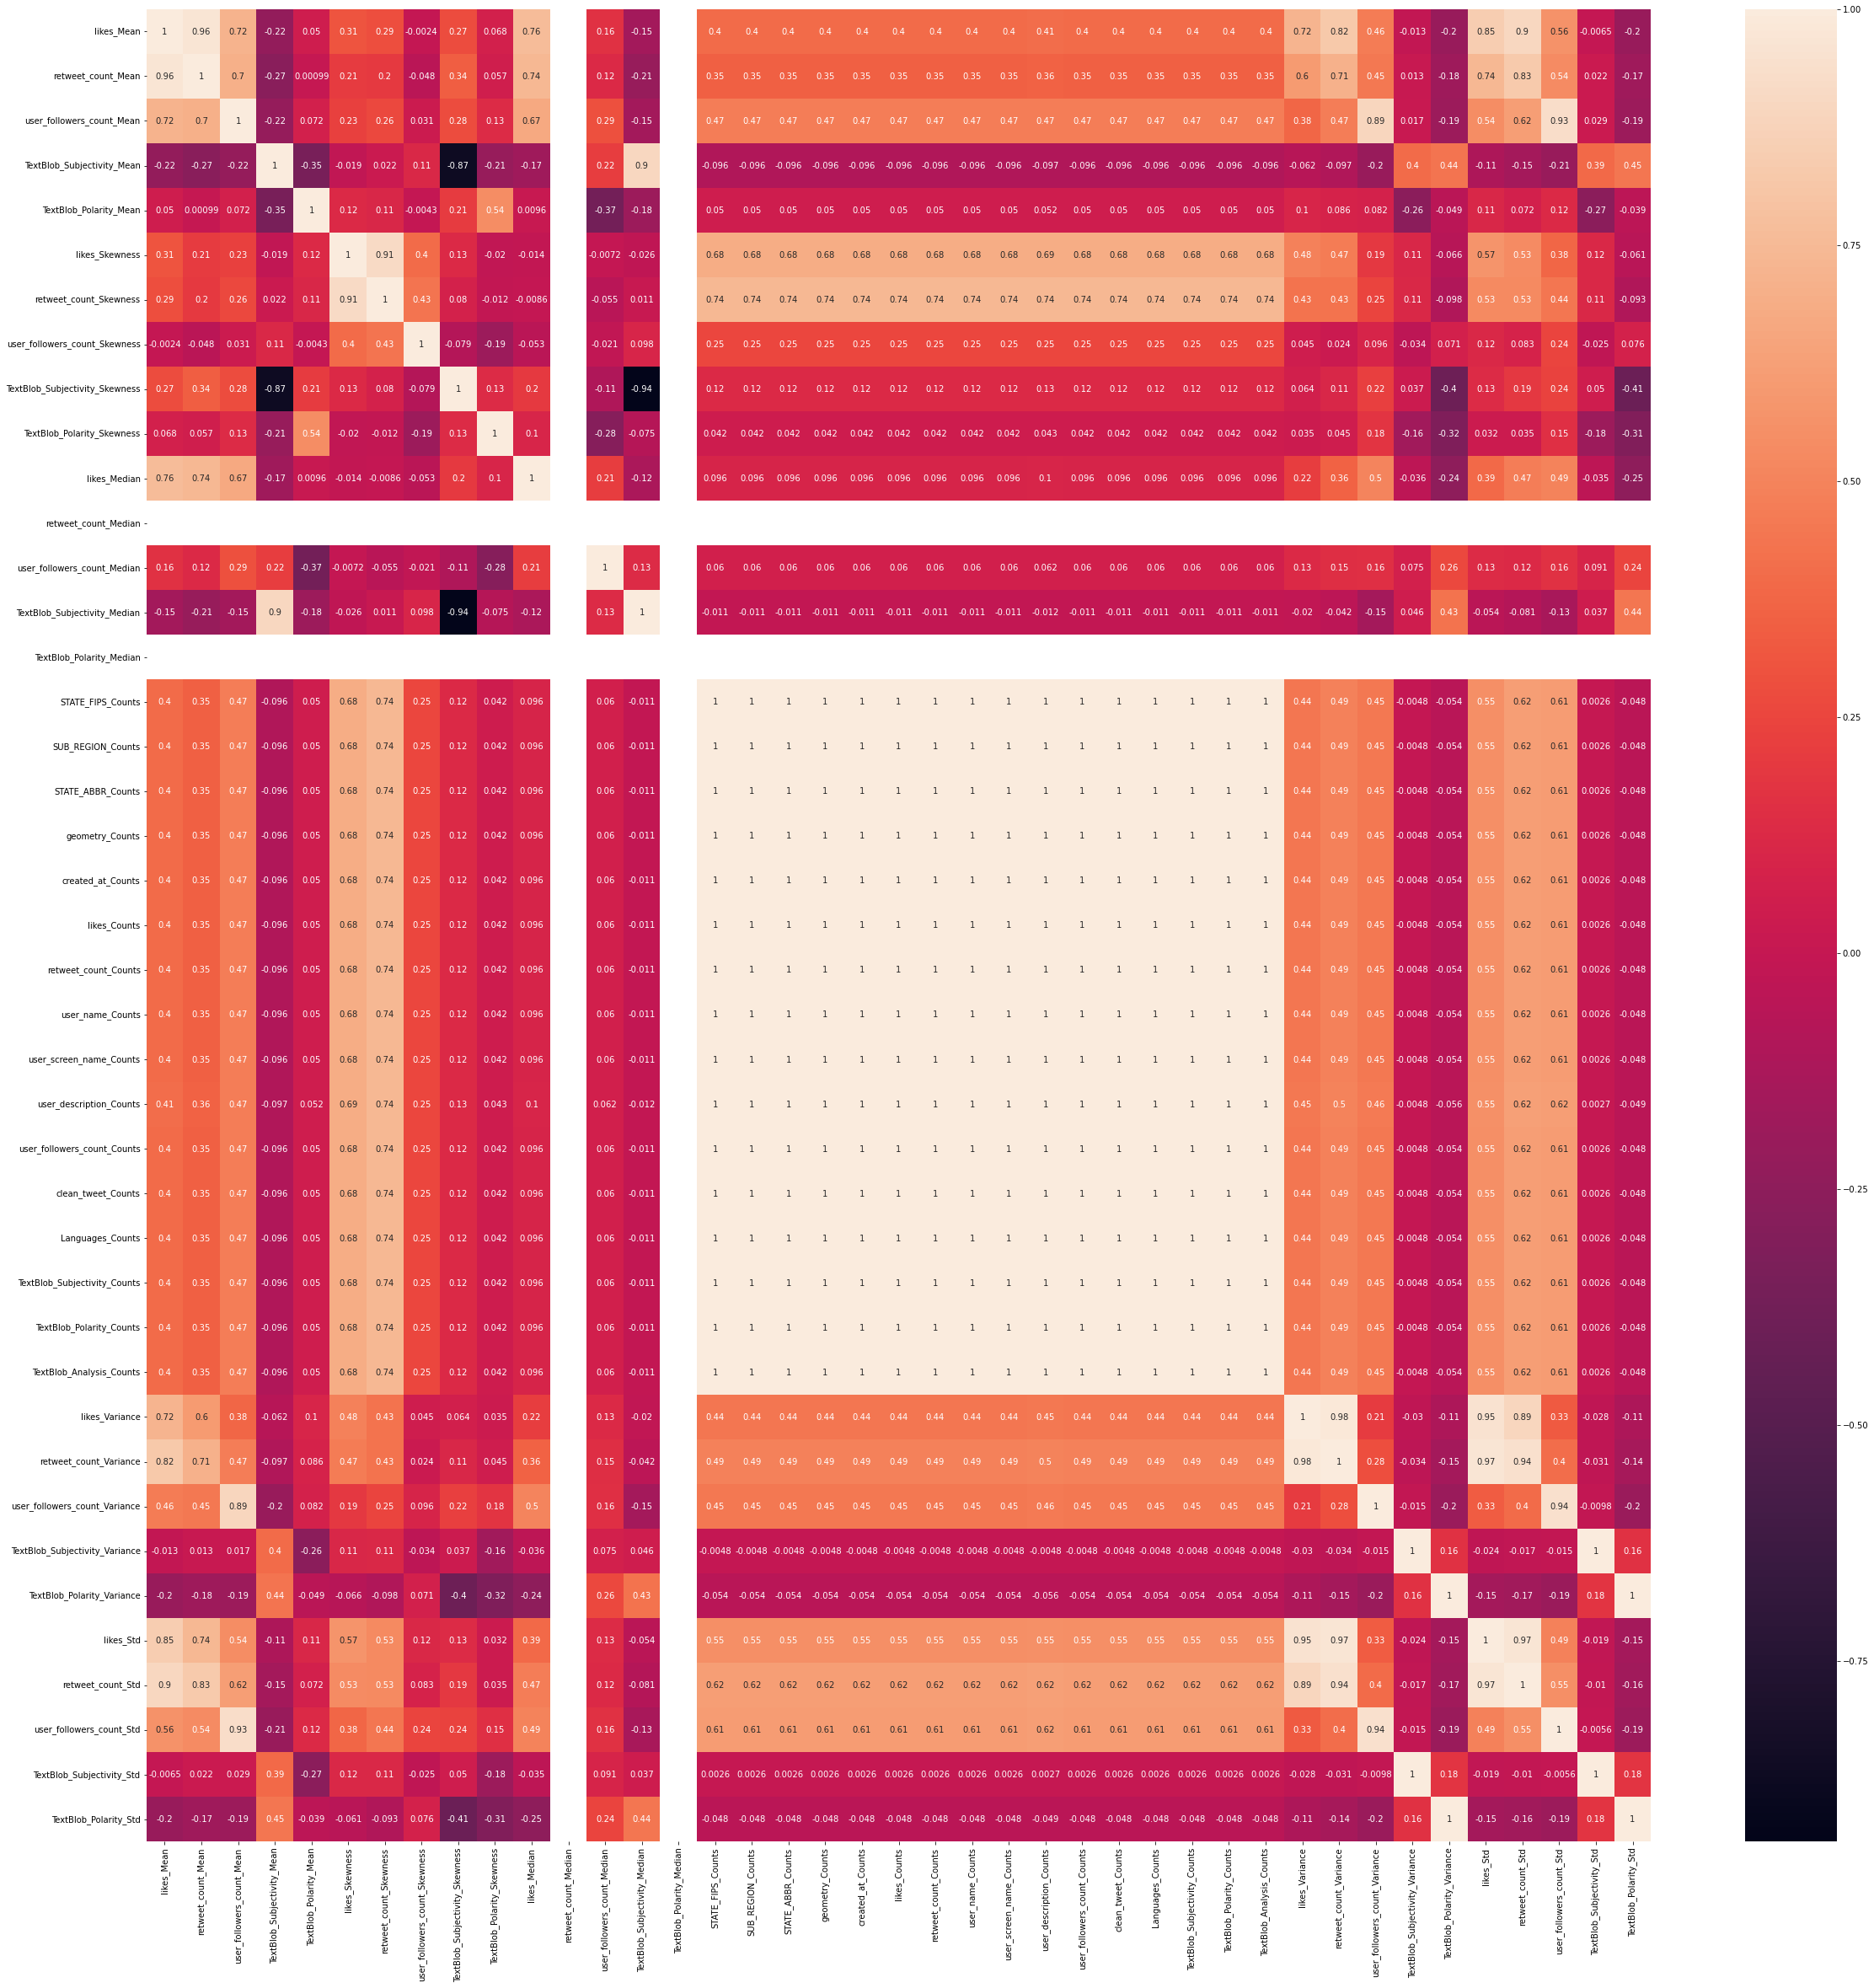

In [4]:
# heatmap
plt.figure(figsize=(40,40))
sns.heatmap(states_mined.corr(), annot=True)
plt.show()

Strong correlation can be found between 2 features: likes and retweet_count 

Text(0, 0.5, 'likes_Std')

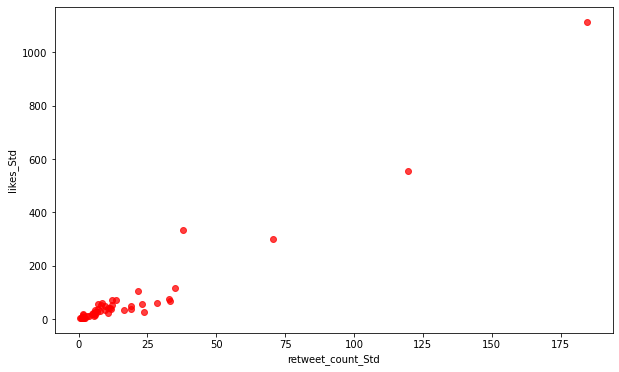

In [5]:
# scatter plots of two parameters with high correlation
col1 = 'retweet_count_Std'
col2 = 'likes_Std'

plt.figure(figsize=(10, 6))

plt.scatter(states_mined[col1],
            states_mined[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [6]:
# find out datatypes
states_mined.dtypes

STATE_NAME                         object
likes_Mean                        float64
retweet_count_Mean                float64
user_followers_count_Mean         float64
TextBlob_Subjectivity_Mean        float64
TextBlob_Polarity_Mean            float64
likes_Skewness                    float64
retweet_count_Skewness            float64
user_followers_count_Skewness     float64
TextBlob_Subjectivity_Skewness    float64
TextBlob_Polarity_Skewness        float64
likes_Median                      float64
retweet_count_Median              float64
user_followers_count_Median       float64
TextBlob_Subjectivity_Median      float64
TextBlob_Polarity_Median          float64
STATE_FIPS_Counts                   int64
SUB_REGION_Counts                   int64
STATE_ABBR_Counts                   int64
geometry_Counts                     int64
created_at_Counts                   int64
likes_Counts                        int64
retweet_count_Counts                int64
user_name_Counts                  

In [7]:
# to see full info about the data at once we can use info()
states_mined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 42 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   STATE_NAME                      51 non-null     object 
 1   likes_Mean                      51 non-null     float64
 2   retweet_count_Mean              51 non-null     float64
 3   user_followers_count_Mean       51 non-null     float64
 4   TextBlob_Subjectivity_Mean      51 non-null     float64
 5   TextBlob_Polarity_Mean          51 non-null     float64
 6   likes_Skewness                  51 non-null     float64
 7   retweet_count_Skewness          51 non-null     float64
 8   user_followers_count_Skewness   51 non-null     float64
 9   TextBlob_Subjectivity_Skewness  51 non-null     float64
 10  TextBlob_Polarity_Skewness      51 non-null     float64
 11  likes_Median                    51 non-null     float64
 12  retweet_count_Median            51 non

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Public\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: num must be 1 <= num <= 18, not 19

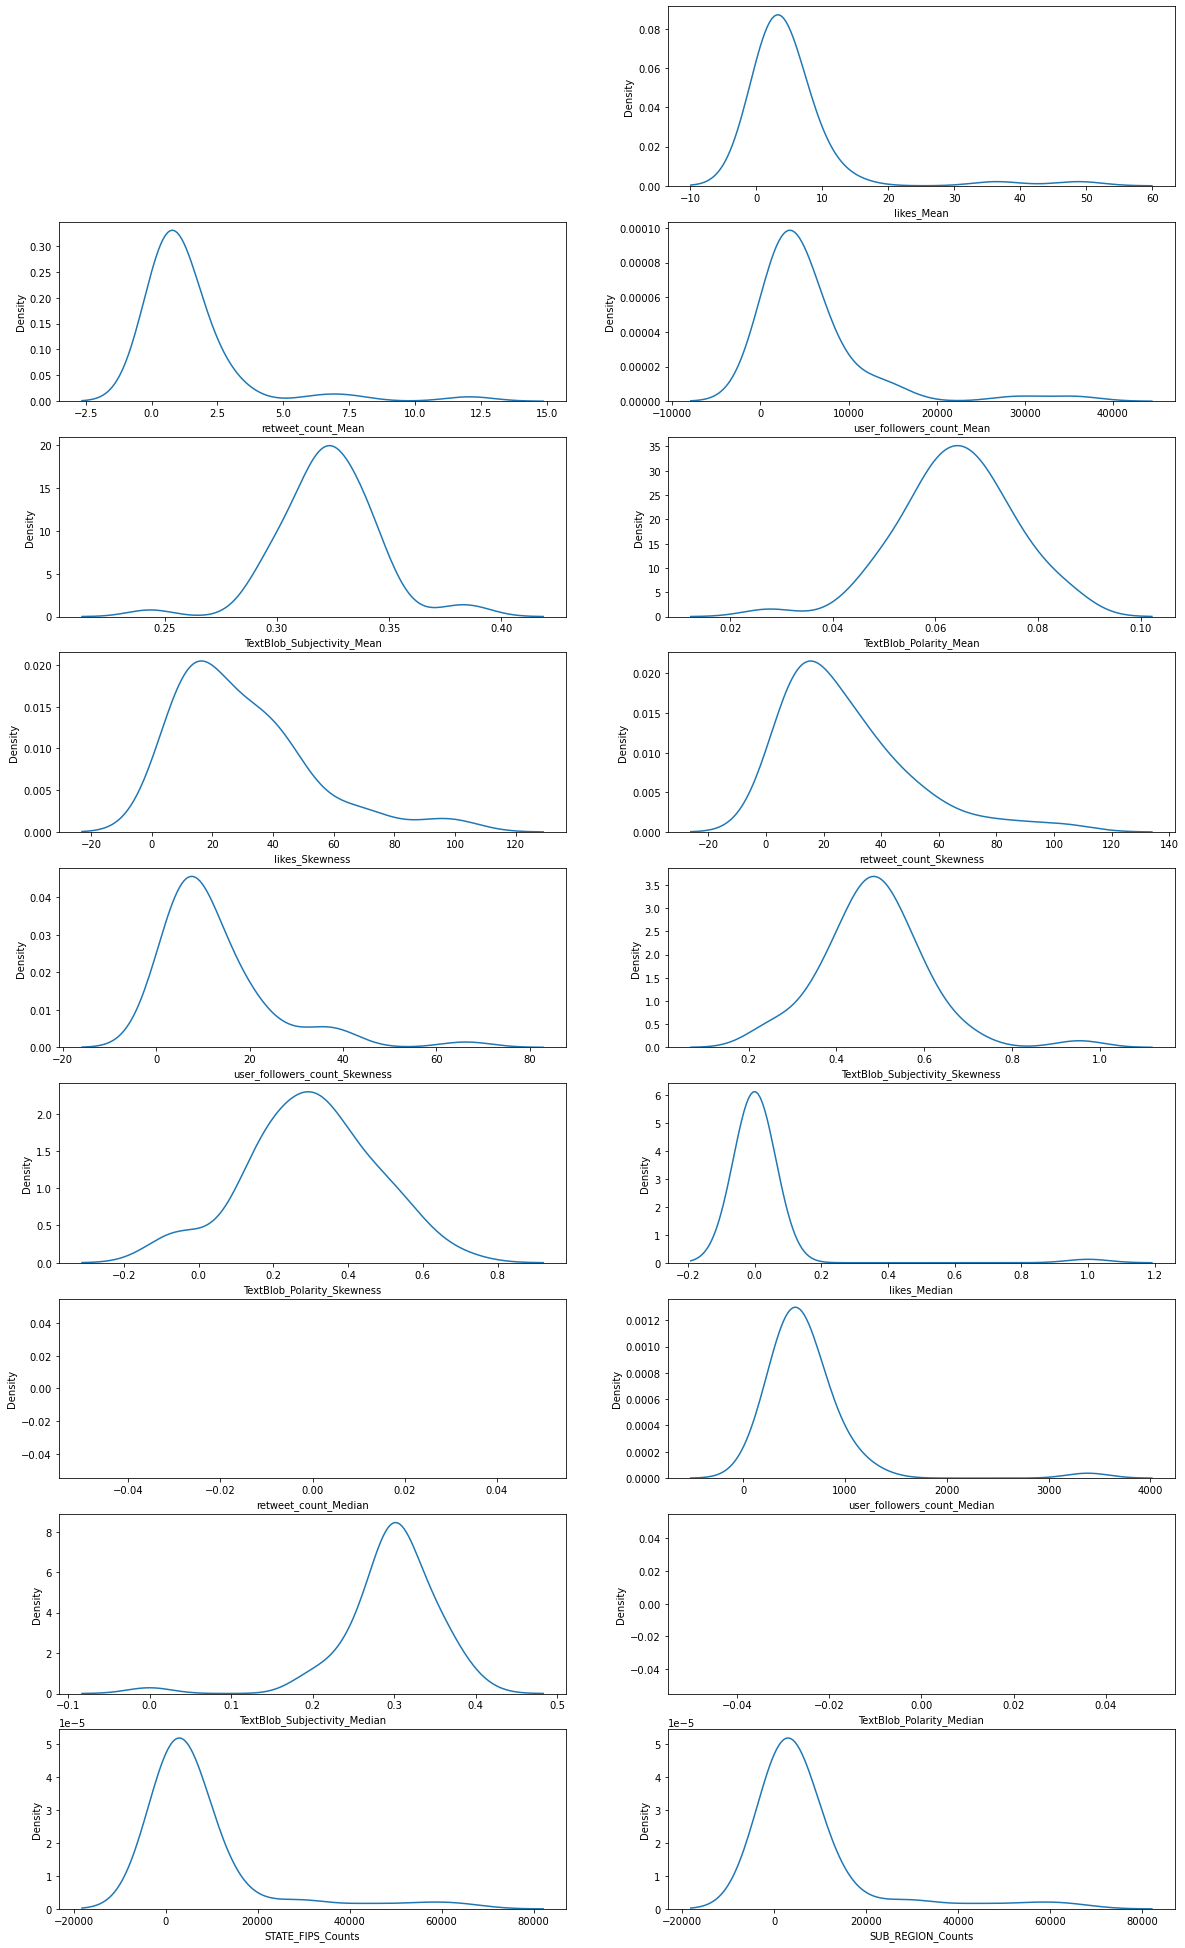

In [8]:
#lets see data distribution to check how skewed our data
plt.figure(figsize=(20,35))
for i, col in enumerate(states_mined.columns):
    if states_mined[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(states_mined[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

Some data is very skewed.

## Data preprocessing

In [9]:
# Firstly we should drop the columns which are not important for clustering 
# Names of states do not influence the results of clustering
state_names = states_mined['STATE_NAME']
states_mined.drop(['STATE_NAME'], axis=1, inplace=True)

Two features 'likes' and 'retweet_count' are highly correlated, so we can exclude one of them from the analysis.
Both features have almost the same correlation with other features, so it doesn't metter which one to exclude (it should not influence the results of clustering somehow). As 'retweet_count' has worse distribution than 'likes', it was decided to exclude 'retweet_count'.

In [10]:
#states_mined.drop(['retweet_count'], axis=1, inplace=True)

In [11]:
# lets try to to get at least a little bit better distribution
columns = states_mined.columns

for col in columns:
    states_mined[col] = np.log(1 + states_mined[col])

C:\Users\Public\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
C:\Users\Public\Anaconda3\lib\site-packages\seaborn\distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


ValueError: num must be 1 <= num <= 18, not 19

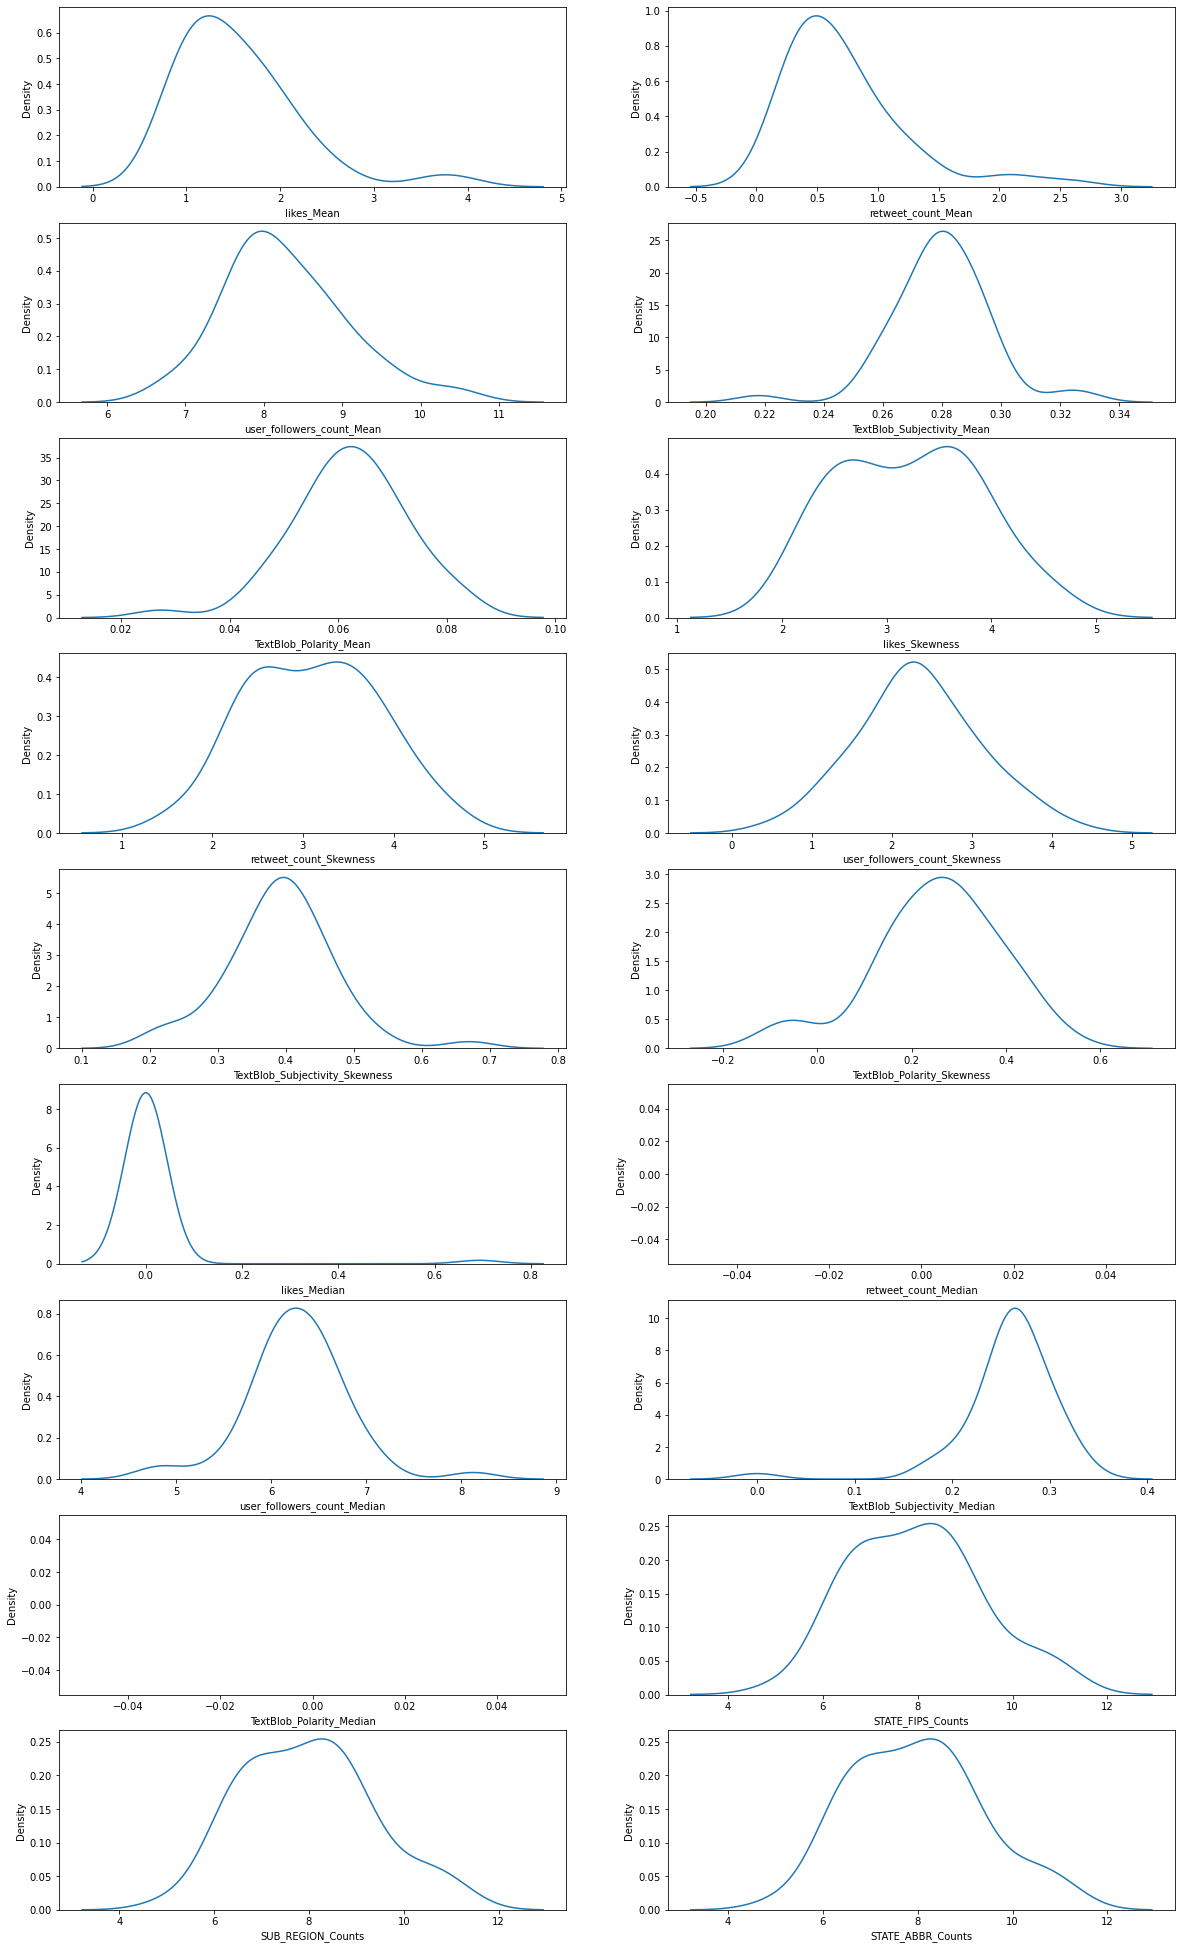

In [12]:
plt.figure(figsize=(20,35))
for i, col in enumerate(states_mined.columns):
    if states_mined[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(states_mined[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

The distribution now looks better.

In [13]:
# rounding to 3 decimal
states_mined = states_mined.round(3)

To have a better clustering visualization later we can do PCA.
But before we can do PCA (principal component analysis), we should make sure that there are no infinite or NaN values.

In [14]:
# checking for infinity 
ds = states_mined.isin([np.inf, -np.inf])
print(ds)

    likes_Mean  retweet_count_Mean  user_followers_count_Mean  \
0        False               False                      False   
1        False               False                      False   
2        False               False                      False   
3        False               False                      False   
4        False               False                      False   
5        False               False                      False   
6        False               False                      False   
7        False               False                      False   
8        False               False                      False   
9        False               False                      False   
10       False               False                      False   
11       False               False                      False   
12       False               False                      False   
13       False               False                      False   
14       False           

In [15]:
# printing the count of infinity values
print("\nCount of infinity values: \n")
count = states_mined.isin([np.inf, -np.inf]).values.sum()
print("It contains " + str(count) + " infinite values")


Count of infinity values: 

It contains 0 infinite values


In [16]:
np.any(np.isnan(states_mined))

False

In [17]:
np.all(np.isfinite(states_mined))

True

In [18]:
# PCA (principal component analysis)

from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
states_mined_pca = pca.fit_transform(states_mined)

In [19]:
states_mined_pca = np.matrix(states_mined_pca)
states_mined_pca.shape

(51, 3)

In [20]:
states_mined_pca = pd.DataFrame(states_mined_pca)

In [21]:
# Calculate Euclidean distance (distance between dataset)
# This will ensure that the elements are combined into clusters and store them in a special variable

#donald_df
data_dist = pdist (states_mined_pca, 'euclidean')
data_linkage = linkage (data_dist, method = 'average')

## Determining the number of clusters

### Elbow method

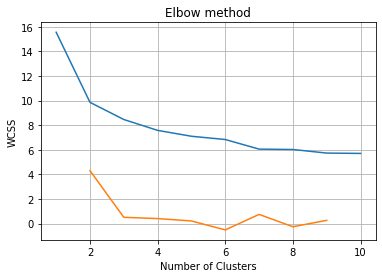

clusters: 2


In [22]:
last = data_linkage[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')

plt.grid()
plt.show()

k = acceleration_rev.argmax()+ 2 
print("clusters:", k)

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1039: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


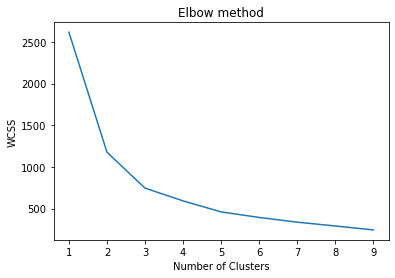

In [23]:
kmeans_models = [KMeans(n_clusters=k, random_state=23).fit(states_mined_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_models]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

The best number of clusters is selected in the point where two lines (blue and orange lines in the picture above) are the most close to each other. Here we should stick to 2 clusters.

### Silhouette coefficient

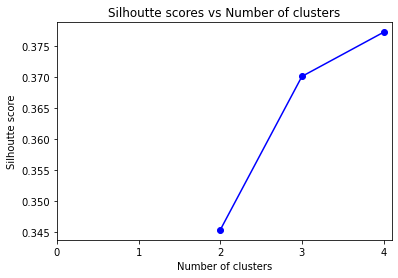

In [24]:
from sklearn.metrics import silhouette_score

silhoutte_scores = [silhouette_score(states_mined_pca, model.labels_) for model in kmeans_models[5:8]]
plt.plot(range(2,5), silhoutte_scores, "bo-")
plt.xticks([0,1,2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [25]:
# determine the number of clusters using the K-means method
for n_cluster in range (2, 11):
    kmeans = KMeans (n_clusters = n_cluster) .fit (states_mined_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score (states_mined_pca, label, metric = 'euclidean')
    print ("For n_clusters = {}, The Silhouette Coefficient is {}". format (n_cluster, sil_coeff))

For n_clusters = 2, The Silhouette Coefficient is 0.4364530278236056
For n_clusters = 3, The Silhouette Coefficient is 0.42377254733214514
For n_clusters = 4, The Silhouette Coefficient is 0.3484403121314575
For n_clusters = 5, The Silhouette Coefficient is 0.4010265356102306
For n_clusters = 6, The Silhouette Coefficient is 0.3676082327631287
For n_clusters = 7, The Silhouette Coefficient is 0.3229650431776077
For n_clusters = 8, The Silhouette Coefficient is 0.3574055015200905
For n_clusters = 9, The Silhouette Coefficient is 0.3645917085442838
For n_clusters = 10, The Silhouette Coefficient is 0.3320459443147937


According to the Silhouette coefficient we should stick to 2 clusters.

### Hierarchical clustering and dendrogram

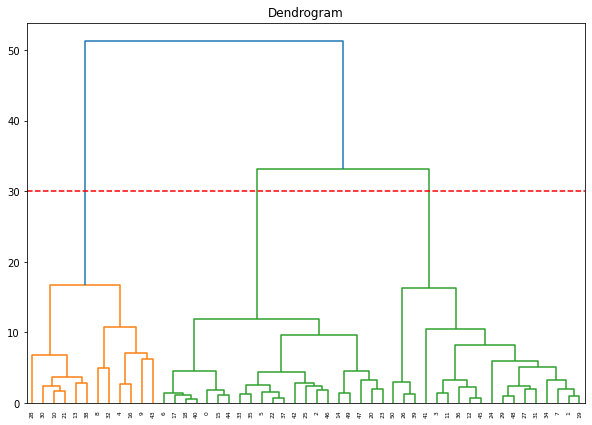

In [26]:
import scipy.cluster.hierarchy as shc
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram")  
dend = shc.dendrogram(shc.linkage(states_mined_pca, method='ward'))
plt.axhline(y=30, color='r', linestyle='--')

From hierarchical clustering we also see that the best number of clusters is equal to 2.

## Clustering 

### Clustering with K-means

In [27]:
# build clustering using the KMeans method
km = KMeans(n_clusters = 2).fit(states_mined_pca)

In [28]:
# display the resulting distribution by clusters
# also the number of the cluster to which the string belongs
clustersKmean = km.labels_ + 1
clustersKmean

array([2, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1,
       1, 2, 2, 1, 2, 2, 1, 2, 1, 2, 1, 1, 2, 1, 2, 1, 1, 2, 2, 2, 1, 1,
       2, 2, 1, 2, 2, 2, 2])

In [29]:
len(km.labels_)
states_mined_pca['id_clusters'] = np.array(km.labels_ +1) 
states_mined_pca.columns

Index([0, 1, 2, 'id_clusters'], dtype='object')

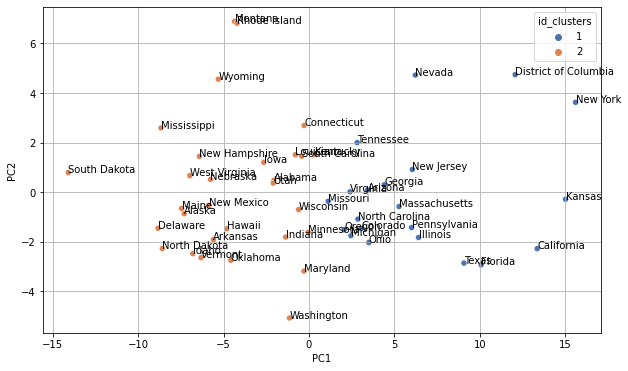

In [30]:
#Lets visialize the clusters
states_mined['cluster_id'] = km.labels_ + 1 
for col in columns:
    states_mined[col] = np.exp(states_mined[col])
    
plt.figure(figsize=(10,6))
sns.scatterplot(data=states_mined_pca, x = 0, y = 1, hue ='id_clusters', palette = 'deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(state_names)):
    plt.text(states_mined_pca.loc[i,0], states_mined_pca.loc[i,1], s = state_names[i])
plt.grid()
plt.show()

In [31]:
# add cluster numbers to the original data
dataK = states_mined
dataK['group_no'] = clustersKmean

In [34]:
# Creating a new file with clusters
writer = pd.ExcelWriter('tweets_clust.xlsx')
dataK.to_excel(writer, 'KMeans')
writer.save()

### Hierarchical clustering and dendrogram

C:\Users\Public\Anaconda3\lib\site-packages\sklearn\utils\validation.py:1675: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['int', 'str']. An error will be raised in 1.2.
  warnings.warn(


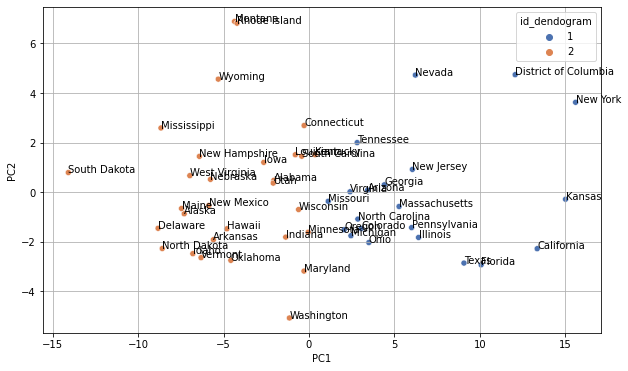

In [33]:
from sklearn.cluster import AgglomerativeClustering
cluster = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
predicted_labels = cluster.fit_predict(states_mined_pca)

states_mined_pca['id_dendogram'] = np.array(km.labels_ +1) 
states_mined_pca.columns

plt.figure(figsize=(10,6))
sns.scatterplot(data=states_mined_pca, x = 0, y = 1, hue ='id_dendogram', palette = 'deep')
plt.xlabel('PC1')
plt.ylabel('PC2')
for i in range(len(state_names)):
    plt.text(states_mined_pca.loc[i,0], states_mined_pca.loc[i,1], s = state_names[i])
plt.grid()
plt.show()

Although the clusters of some points differ from the results got after K-means clustering, the pattern is the same.

# Joe Biden (clustering)

## Data exploration

In [ ]:
# upload dataset Donuld Trump
joe_df = pd.read_csv('States_joe_mined.csv')
print('Dimension of array:{}'.format(donald_df.shape))
joe_df

In [ ]:
# let's see the presence of correlations between values 
joe_df.corr ()

In [ ]:
#Strong correlation can be found between 2 features: likes and retweet_count 
# scatter plots of two parameters with high correlation
col1 = 'likes'
col2 = 'retweet_count'

plt.figure(figsize=(10, 6))

plt.scatter(joe_df[col1],
            joe_df[col2],
            alpha=0.75,
            color='red')
plt.xlabel(col1)
plt.ylabel(col2)

In [ ]:
joe_df.isnull().any().any()

In [ ]:
joe_df.dtypes

In [ ]:
joe_df.info()

In [ ]:
#lets see data distribution to check how skewed our data
plt.figure(figsize=(20,35))
for i, col in enumerate(joe_df.columns):
    if joe_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(joe_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

## Data processing

In [ ]:
# Firstly we should drop the columns which are not important for clustering 
# Names of states do not influence the results of clustering
joe_df.drop(['STATE_NAME'], axis=1, inplace=True)

In [ ]:
# lets try to to get at least a little bit better distribution
columns = ['likes', 'retweet_count', 'user_followers_count', 'TextBlob_Subjectivity', 'TextBlob_Polarity']

for col in columns:
    joe_df[col] = np.log(1 +joe_df[col])

In [ ]:
plt.figure(figsize=(20,35))
for i, col in enumerate(joe_df.columns):
    if joe_df[col].dtype != 'object':
        ax = plt.subplot(9, 2, i+1)
        sns.kdeplot(joe_df[col], ax=ax)
        plt.xlabel(col)
        
plt.show()

In [ ]:
# rounding to 3 decimal
joe_df = joe_df.round(3)

In [ ]:
# checking for infinity 
a = joe_df.isin([np.inf, -np.inf])
print(a)

In [ ]:
# printing the count of infinity values
print("\nCount of infinity values: \n")
count = joe_df.isin([np.inf, -np.inf]).values.sum()
print("It contains " + str(count) + " infinite values")

In [ ]:
# PCA (principal component analysis) to work on correlation
pca1 = PCA(n_components=0.95)
joe_pca = pca.fit_transform(joe_df)

In [ ]:
# Calculate Euclidean distance (distance between dataset)
# This will ensure that the elements are combined into clusters and store them in a special variable
data_dis = pdist (joe_pca, 'euclidean')
data_link = linkage (data_dis, method = 'average')

## Determining the number of clusters

### Elbow method

In [ ]:
last = data_link[-10:, 2]
last_rev = last[::-1]
idxs = np.arange(1, len(last) + 1)
plt.plot(idxs, last_rev)

acceleration = np.diff(last, 2)  
acceleration_rev = acceleration[::-1]
plt.plot(idxs[:-2] + 1, acceleration_rev)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

k = acceleration_rev.argmax()+ 2 
print("clusters:", k)

In [ ]:
kmeans_2 = [KMeans(n_clusters=k, random_state=23).fit(joe_pca) for k in range (1, 10)]
innertia = [model.inertia_ for model in kmeans_2]

plt.plot(range(1, 10), innertia)
plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

Should choose k = 3 (3 clusters)

### Silhouette coefficient

In [ ]:
silhoutte_scores2 = [silhouette_score(joe_pca, model.labels_) for model in kmeans_2[5:8]]
plt.plot(range(2,5), silhoutte_scores2, "bo-")
plt.xticks([0,1,2,3,4])
plt.title('Silhoutte scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhoutte score')
plt.show()

In [ ]:
# determine the number of clusters using the K-means method
for n_cluster in range (2, 11):
    kmeans = KMeans (n_clusters = n_cluster) .fit (joe_pca)
    label = kmeans.labels_
    sil_coeff = silhouette_score (joe_pca, label, metric = 'euclidean')
    print ("For n_clusters = {}, The Silhouette Coefficient is {}". format (n_cluster, sil_coeff))

Conclusion: 3 clusters.

## Clustering

### K-means

In [ ]:
# build clustering using the KMeans method
KM = KMeans(n_clusters = 3).fit(joe_pca)

In [ ]:
# display the resulting distribution by clusters
# also the number of the cluster to which the string belongs
clusters_KM = KM.labels_ + 1
clusters_KM 

In [ ]:
#Lets visialize the clusters
joe_df['cluster_id'] = KM.labels_
for col in columns:
    joe_df[col] = np.exp(joe_df[col])
    
plt.figure(figsize=(10,6))
sns.scatterplot(data=joe_df, x='likes', y='user_followers_count', hue='cluster_id')
plt.show()

In [ ]:
# add cluster numbers to the original data
dataKmean = joe_df
dataKmean['group_no'] = clustersKmean

In [ ]:
# Creating a new file with clusters
writer = pd.ExcelWriter('joe_df_for_clust.xlsx')
dataKmean.to_excel(writer, 'KMeans')
writer.save()

### Hierarchical clustering and dendrogram

In [ ]:
plt.figure(figsize=(10, 7))  
plt.title("Dendrogram - Joe Biden")  
d = shc.dendrogram(shc.linkage(joe_pca, method='ward'))
plt.axhline(y=25000, color='r', linestyle='--')

In [ ]:
clustering = AgglomerativeClustering(n_clusters=3, affinity='euclidean', linkage='ward')  
clustering.fit_predict(joe_pca)

In [ ]:
plt.figure(figsize=(10, 7))  
plt.scatter(joe_df['likes'], joe_df['user_followers_count'], c=cluster.labels_) 

Although the clusters of some points differ from the results got after K-means clustering, the pattern is the same.